# Dependences

### Bibliography: Course 514 class notes, Introduction to Probability Dimitri P. Bertsekas and John N. Tsitsiklis,

In [330]:
# Dependences
### Bibliography: Course 514 class notes, Introduction to Probability Dimitri P. Bertsekas and John N. Tsitsiklis,
import numpyro
import jax
import numpy as np
from  matplotlib import pyplot as plt
import pangolin as pg
import scipy.stats as sts
import math 

# Q1

In [643]:
 # Q1  Model
def model(mu, var, iter):
    z_1 = pg.normal(mu, var)
    Z = pg.autoregressive(lambda last, scale: pg.normal(z_1, scale), 1)
    scales = range(1)
    zt_1 = Z(0.0, scales)
    Z_t_1_ = pg.sample(zt_1[1], niter=iter)
    z_1 = pg.sample(zt_1, niter=iter)
    xt_ = pg.normal(zt_1[1], 1)
    xt = pg.sample(xt_, niter=iter)
    return xt, Z_t_1_
xt, zt = model(50, 1.25, 3)

NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


In [644]:
# Q2
data_t = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls1/t.npy')
data_x = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls1/x_t.npy')
observed_times = data_t
x_obs = data_x
# =========================
# Model for iter=100 mu = 50, var = 1.25
z, zt = model(50, 1.25, 365)
# To convert x_obs[0:100] to x_obs[0:365] with respect of time positions
def z_samples_365(observed_times, z_samples_aux):
    a = np.arange(1, 366)
    b = observed_times
    c = np.isin(a,b)
    ty = c*a
    j = -1
    z_sample = []
    for i in range(0, len(ty)):
        if ty[i] == 0:
            z_sample.append(0)
        else:
            z_sample.append(z_samples_aux[j])
            j = j + 1
    return z_sample
xt = z_samples_365(observed_times, x_obs)
# ========================
# Metropolis-Hastings 
y = []
for i in range(0, len(z)):
    proposed = z[i] - xt[i] 
    fy = pg.normal(proposed, 1)  
    fy_s = pg.sample(fy)
    fx = pg.normal(xt[i], 1)
    fx_s = pg.sample(fx)    
    # Aceptation radio
    r = fy_s/fx_s    
    # Threshold with ~U(0, 1) 
    alpha = min(r) 
    alpha2 = min(alpha, 1)    
    u = pg.uniform(0,1)
    q = pg.sample(u)  
    if q[i] <= alpha2:
        y.append(z[i])
    else:
        y.append(xt[i])
# ===========================================
locs = pg.makerv(y)
z_samples = pg.slot()
with pg.Loop(365) as i:
    z_samples[i] = pg.normal(locs[i], 1)
z_samples = pg.sample(z_samples)

NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


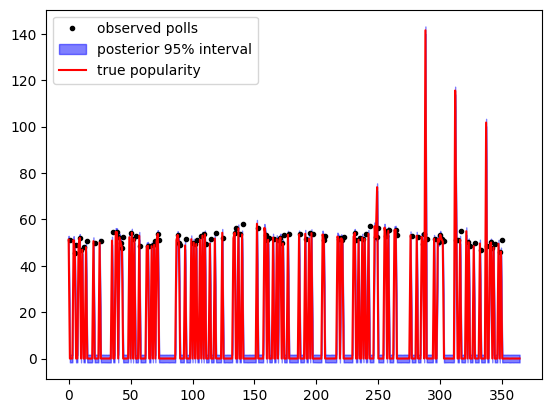

In [646]:
# Q3
plt.plot(observed_times,x_obs,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

In [456]:
# Q4 Model 
def model(mu, var, var2, iter):
    z_1 = pg.normal(mu, var)
    Z = pg.autoregressive(lambda last, scale: pg.normal(z_1, scale), 1)
    scales = range(1)
    zt_1 = Z(0.0, scales)
    Z_t_1_ = pg.sample(zt_1[1], niter=iter)
    z_1 = pg.sample(zt_1, niter=iter)
    xt_ = pg.normal(zt_1[1], var2)
    xt = pg.sample(xt_, niter=iter)
    return xt, Z_t_1_

data_t = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls1/t.npy')
data_x = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls1/x_t.npy')
observed_times = data_t
x_obs = data_x
# =========================
# Model for iter=100 mu = 50, var = 1.25
var = pg.exponential(1)
var2 = pg.exponential(1)
z, zt = model(50, var, var2, 365)
# To convert x_obs[0:100] to x_obs[0:365] with respect of time positions
def z_samples_365(observed_times, z_samples_aux):
    a = np.arange(1, 366)
    b = observed_times
    c = np.isin(a,b)
    ty = c*a
    j = -1
    z_sample = []
    for i in range(0, len(ty)):
        if ty[i] == 0:
            z_sample.append(0)
        else:
            z_sample.append(z_samples_aux[j])
            j = j + 1
    return z_sample
xt = z_samples_365(observed_times, x_obs)
# ========================
# Metropolis-Hastings 
y = []
for i in range(0, len(z)):
    proposed = z[i] - xt[i] 
    fy = pg.normal(proposed, 1)  
    fy_s = pg.sample(fy)
    fx = pg.normal(xt[i], 1)
    fx_s = pg.sample(fx)    
    # Aceptation radio
    r = fy_s/fx_s    
    # Threshold with ~U(0, 1) 
    alpha = min(r) 
    alpha2 = min(alpha, 1)    
    u = pg.uniform(0,1)
    q = pg.sample(u)  
    if q[i] <= alpha2:
        y.append(z[i])
    else:
        y.append(xt[i])
# ===========================================
locs = pg.makerv(y)
zt = pg.slot()
with pg.Loop(365) as i:
    zt[i] = pg.normal(locs[i], 1)
zt = pg.sample(zt)

NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


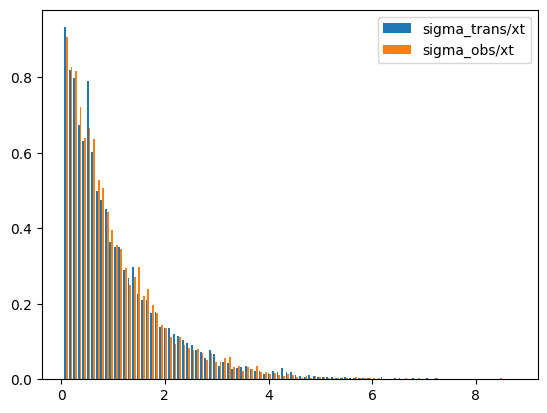

In [480]:
# Q5
def model(mu, var, var2, iter):
    z_1 = pg.normal(mu, var)
    Z = pg.autoregressive(lambda last, scale: pg.normal(z_1, scale), 1)
    scales = range(1)
    zt_1 = Z(0.0, scales)
    Z_t_1_ = pg.sample(zt_1[1], niter=iter)
    z_1 = pg.sample(zt_1, niter=iter)
    xt_ = pg.normal(zt_1[1], var2)
    xt = pg.sample(xt_, niter=iter)
    return xt_, xt
var = pg.exponential(1)
var2 = pg.exponential(1)
x_t, xt_sample = model(50, var, var2, 365)
x_trans = pg.sample(var,x_t,1) 
x_raw_ob = pg.sample(var2,x_t,1)
plt.hist([x_trans, x_raw_ob], bins=100, density=True, label=['sigma_trans/xt', 'sigma_obs/xt'])
plt.legend()


NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


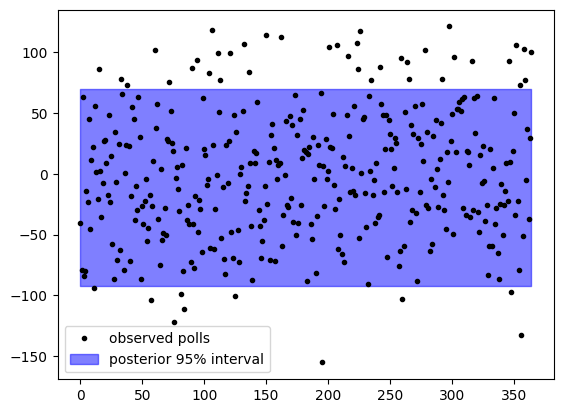

In [487]:
# Q7 Only the plot
# Model
def model(mu, var, iter):
    z_1 = pg.normal(mu, var)
    Z = pg.autoregressive(lambda last, scale: pg.normal(z_1, scale), 1)
    scales = range(1)
    zt_1 = Z(0.0, scales)
    Z_t_1_ = pg.sample(zt_1[1], niter=iter)
    z_1 = pg.sample(zt_1, niter=iter)
    xt_ = pg.normal(zt_1[1], 1)
    xt = pg.sample(xt_, niter=iter)
    return xt, Z_t_1_
xt, zt = model(50, 1.25, 365)

plt.plot(np.arange(365),xt,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(zt,5,axis=0),
                 np.percentile(zt,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.legend()

In [555]:
data_t = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls2/t.npy')
data_x = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls2/x_t.npy')
observed_times = data_t
x_obs = data_x
x_obs[0]
x_obs_3_poll = []
for i in x_obs:
    x_obs_3_poll.append(i)
x123 = [z_samples_365(data_t[i], x_obs_3_poll[i]) for i in range(0, len(x_obs_3_poll))]
x123[0][360]

0

In [650]:
# Q8
def model(mu, var, iter):
    z_1 = pg.normal(mu, var)
    Z = pg.autoregressive(lambda last, scale: pg.normal(z_1, scale), 1)
    scales = range(1)
    zt_1 = Z(0.0, scales)
    Z_t_1_ = pg.sample(zt_1[1], niter=iter)
    z_1 = pg.sample(zt_1, niter=iter)
    xt_ = pg.normal(zt_1[1], 1)
    xt = pg.sample(xt_, niter=iter)
    return xt, Z_t_1_
# To convert x_obs[0:100] to x_obs[0:365] with respect of time positions
def z_samples_365(observed_times, z_samples_aux):
    a = np.arange(1, 366)
    b = observed_times
    c = np.isin(a,b)
    ty = c*a
    j = -1
    z_sample = []
    for i in range(0, len(ty)):
        if ty[i] == 0:
            z_sample.append(0)
        else:
            z_sample.append(z_samples_aux[j])
            j = j + 1
    return z_sample

data_t = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls2/t.npy')
data_x = np.load('/home/monica/Documents/class589MachineLearning/Assigna3/polls2/x_t.npy')
observed_times = data_t
x_obs = data_x
x_obs_3_poll = []
for i in x_obs:
    x_obs_3_poll.append(i)
x_obs123 = [z_samples_365(data_t[i], x_obs_3_poll[i]) for i in range(0, len(x_obs_3_poll))]
# =========================
# Model for iter=100 mu = 50, var = 1.25
z, zt = model(50, 1.25, 365)
# ========================
# Metropolis-Hastings 
rows, cols = (3, 365)
y = [[0]*cols]*rows
for j in range(0, len(x_obs123)-1):
    for i in range(0, len(z)):
        proposed = z[i] - x_obs123[j][i] 
        fy = pg.normal(proposed, 1)  
        fy_s = pg.sample(fy)
        fx = pg.normal(x_obs123[j][i], 1)
        fx_s = pg.sample(fx)    
        # Aceptation radio
        r = fy_s/fx_s    
        # Threshold with ~U(0, 1) 
        alpha = min(r) 
        alpha2 = min(alpha, 1)    
        u = pg.uniform(0,1)
        q = pg.sample(u)  
        if q[i] <= alpha2:
            y[j][i] = z[i]
        else:
            y[j][i] = x_obs123[j][i]
# ===========================================
locs = pg.makerv(y)    
z_samples = pg.slot()
with pg.Loop(3) as i:    
    with pg.Loop(365) as j:           
        z_samples[i,j] = pg.normal(locs[i,j], 1+i+j)
zt = pg.sample(z_samples)        

NONE
NOT
NONE
NOT
NONE
NOT
NONE
NOT


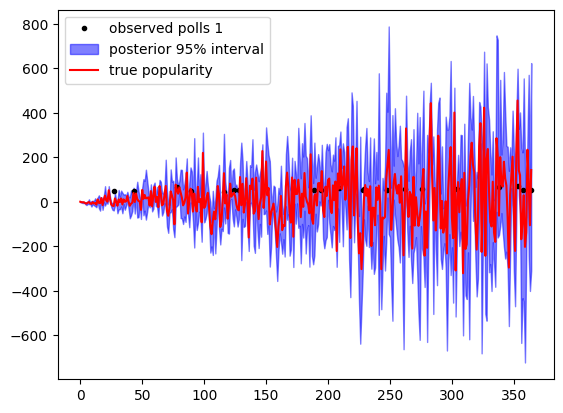

In [652]:
# Q9
plt.plot(observed_times[0],x_obs[0],'k.',label='observed polls 1')
plt.fill_between(np.arange(365),
                 np.percentile(zt[0],5,axis=0),
                 np.percentile(zt[0],95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(zt[0].mean(0),'r-',label='true popularity')
plt.legend()

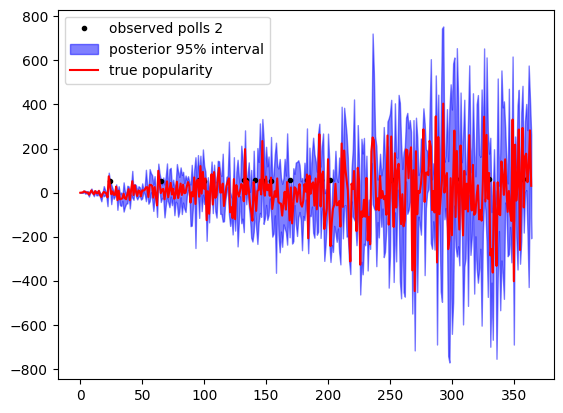

In [657]:
# Q9
plt.plot(observed_times[1],x_obs[1],'k.',label='observed polls 2')
plt.fill_between(np.arange(365),
                 np.percentile(zt[1],5,axis=0),
                 np.percentile(zt[1],95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(zt[1].mean(0),'r-',label='true popularity')
plt.legend()

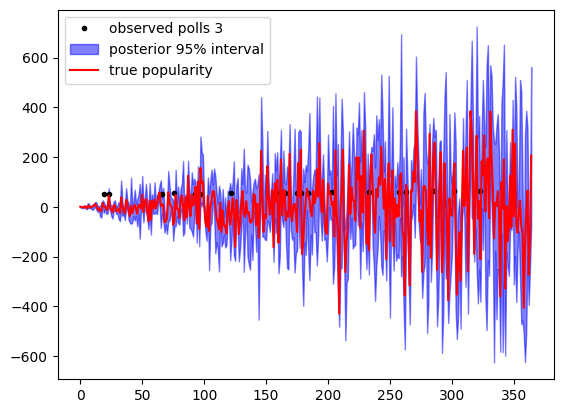

In [656]:
# Q9
plt.plot(observed_times[2],x_obs[2],'k.',label='observed polls 3')
plt.fill_between(np.arange(365),
                 np.percentile(zt[2],5,axis=0),
                 np.percentile(zt[2],95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(zt[2].mean(0),'r-',label='true popularity')
plt.legend()

(array([0.00123594, 0.        , 0.        , 0.        , 0.        ,
        0.00123594, 0.        , 0.        , 0.00247188, 0.        ,
        0.        , 0.        , 0.00123594, 0.00494374, 0.00617969,
        0.00370781, 0.00494375, 0.00617969, 0.00494374, 0.01730313,
        0.00741563, 0.02101095, 0.01483126, 0.02842657, 0.03707814,
        0.04449377, 0.05438111, 0.04325783, 0.05314534, 0.07415628,
        0.06797659, 0.07662816, 0.1235938 , 0.11617817, 0.14213287,
        0.1495485 , 0.16314382, 0.21134478, 0.24471573, 0.21999697,
        0.25707511, 0.29168137, 0.27067043, 0.29786106, 0.33617514,
        0.32752358, 0.35471421, 0.41527518, 0.35718504, 0.34729961,
        0.44493769, 0.40415173, 0.41527518, 0.39179004, 0.37943297,
        0.35842203, 0.36707359, 0.36954547, 0.35595015, 0.34235483,
        0.31392826, 0.28055793, 0.26819855, 0.26943449, 0.24842354,
        0.26819855, 0.21381728, 0.2014579 , 0.1755032 , 0.14707662,
        0.14213287, 0.12606568, 0.09516723, 0.08

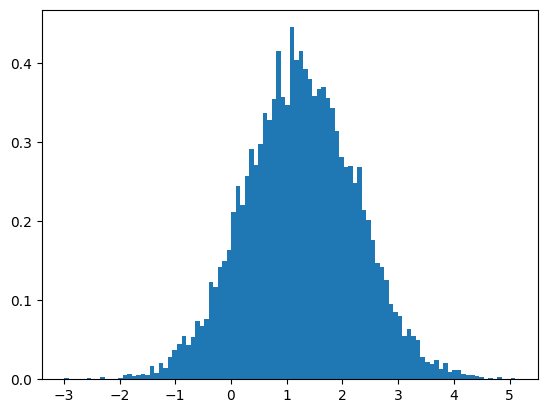

In [710]:
# Q10

#plt.hist([x_trans, x_raw_ob], bins=100, density=True, label=['sigma_trans/xt', 'sigma_obs/xt'])
#plt.legend()

z_1 = pg.normal(1.25, 1) #
transition_noise_samps = pg.sample(z_1)
plt.hist(transition_noise_samps,bins=100,density=True)

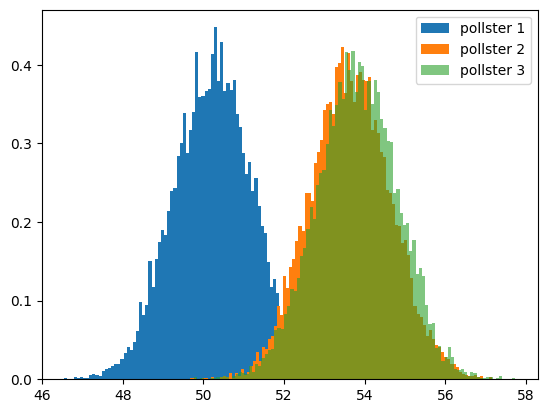

In [719]:
locs = pg.makerv(x_obs_3_poll[0])
zt = pg.slot()
with pg.Loop(20) as i:
    zt[i] = pg.normal(locs[i], 1)
zt= pg.sample(zt)

locs = pg.makerv(x_obs_3_poll[1])
zt1 = pg.slot()
with pg.Loop(20) as i:
    zt1[i] = pg.normal(locs[i], 1)
zt1 = pg.sample(zt1)

locs = pg.makerv(x_obs_3_poll[2])
zt2 = pg.slot()
with pg.Loop(20) as i:
    zt2[i] = pg.normal(locs[i], 1)
zt2 = pg.sample(zt2)


plt.hist(zt[:,0],bins=100,density=True,label='pollster 1')
plt.hist(zt1[:,1],bins=100,density=True,label='pollster 2')
plt.hist(zt2[:,2],bins=100,density=True,label='pollster 3', alpha=0.6)
plt.legend()